
<h1 style="text-align: center;"> **Statistical Analysis of Covid19 Cases in Pakistan**</h1>




## importing libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import plotly.express as ex
import folium

import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Final Project of Tools & Technique
# *'Importing Dataset'* 

In [39]:
data = pd.read_csv("F:/TAT/Project/P_COVID.csv")

In [40]:
data.head(10)

Unnamed: 0  Total  Cumulative  Test positive  Cumulative  tests performed  \
0           4     48                          2                           80   
1           5     61                          0                           95   
2           6     84                         14                          171   
3           7     20                          0                           28   
4           8      3                          0                            0   
5           9     19                          1                           18   
6          10      3                          0                            4   
7          11     10                          2                           26   
8           4     52                          2                           85   
9           5     67                          0                          105   

        Date  Recovered  New Cases  Deaths  Home Quarantine            Region  \
0  3/11/2020          0          1       0                0             Sindh   
1  3/11/2020          0          1       0               59         Islamabad   
2  3/11/2020          1          1       0               87             Sindh   
3  3/11/2020          0          1       0               78         Islamabad   
4  3/11/2020          0          1       0              269  Gilgit-Baltistan   
5  3/11/2020          0          1       0             1477             Sindh   
6  3/11/2020          0          1       0              436             Sindh   
7  3/11/2020          0          9       0                0             Sindh   
8  3/12/2020          0          1       0               56       Balochistan   
9  3/12/2020          0          1       0               70             Sindh   

        City  Still Admitted  Tests  performed in last 24 hours  
0    Karachi               2                                  8  
1  Islamabad               0                                  7  
2    Karachi              13                                 55  
3  Islamabad               0                                  2  
4     Gilgit               0                                  0  
5    Karachi               1                                  4  
6    Karachi               0                                  0  
7    Karachi               2                                  4  
8     Quetta               2                                  5  
9    Karachi               0                                 10

In [41]:
data.tail()

Unnamed: 0   Total  Cumulative  Test positive  \
638           8   10465                       1030   
639           9   69806                       6699   
640          10   76035                      15787   
641          11  325091                      47382   
642          13  265698                      46828   

     Cumulative  tests performed       Date  Recovered  New Cases  Deaths  \
638                        10769  6/12/2020        673          6      15   
639                        69806  6/12/2020       1164         16      65   
640                        90470  6/12/2020       3907          2     632   
641                       327072  6/12/2020       9546          1     890   
642                       265698  6/12/2020      22047          0     776   

     Home Quarantine  Region             City  Still Admitted  \
638              294  Punjab           Jhelum              48   
639             5395  Punjab           Vihari              75   
640            10222  Punjab         Khanewal            1026   
641            34520  Punjab        Pakpattan            2426   
642            22324  Punjab  Dera Ghazi Khan            1681   

     Tests  performed in last 24 hours  
638                                119  
639                               3766  
640                               3571  
641                               9179  
642                              10081

In [42]:
"Getting numeric column detials "
data.describe()

Unnamed: 0          Total  Cumulative  Test positive  \
count  643.000000     643.000000                 643.000000   
mean     8.853810   28049.569207                3587.626750   
std      2.342303   52406.157576                7368.132133   
min      4.000000       0.000000                   0.000000   
25%      7.000000    1155.000000                  86.000000   
50%      9.000000    6224.000000                 465.000000   
75%     11.000000   26332.000000                3207.500000   
max     13.000000  325091.000000               47382.000000   

       Cumulative  tests performed     Recovered   New Cases      Deaths  \
count                   643.000000    643.000000  643.000000  643.000000   
mean                  30525.283048   1160.814930    8.326594   71.382582   
std                   56453.756905   2727.293247   26.351548  146.872462   
min                       0.000000      0.000000    0.000000    0.000000   
25%                    1370.500000      3.000000    1.000000    1.000000   
50%                    5976.000000    140.000000    2.000000    5.000000   
75%                   29644.500000    731.000000    6.000000   45.000000   
max                  327072.000000  22047.000000  450.000000  890.000000   

       Home Quarantine  Still Admitted  Tests  performed in last 24 hours  
count       643.000000      643.000000                         643.000000  
mean       2031.129082      472.922240                        1524.107309  
std        4315.683560     1089.114841                        2937.318710  
min           0.000000        0.000000                       -5670.000000  
25%          49.000000       16.500000                           4.000000  
50%         263.000000       62.000000                         292.000000  
75%        1993.000000      406.000000                        1535.000000  
max       34520.000000     9418.000000                       15937.000000

In [43]:
data.shape

(643, 13)

In [44]:
data.nunique()

Unnamed: 0                            10
Total                                585
Cumulative  Test positive            496
Cumulative  tests performed          587
Date                                  97
Recovered                            354
New Cases                             59
Deaths                               181
Home Quarantine                      361
Region                                 7
City                                  96
Still Admitted                       311
Tests  performed in last 24 hours    427
dtype: int64

In [45]:
data['Region'].unique()

array(['Sindh', 'Islamabad', 'Gilgit-Baltistan', 'Balochistan', 'Punjab',
       'KPK', 'Azad Kashmir'], dtype=object)

In [46]:
data['Recovered'].unique()

array([    0,     1,     2,     3,     4,    14,     5,    16,    42,
          51,    17,     6,    58,    19,    65,    30,     9,    25,
          85,    13,    62,   123,    63,    15,    69,   253,    75,
          70,    34,   269,    76,    96,    10,    74,    35,   280,
          89,   111,   128,    39,   349,    95,   125,   131,   358,
         146,   142,   258,   371,   149,   145,   272,   389,   124,
         155,   153,   508,   419,   137,   175,   178,   427,   140,
         191,   550,   560,   183,    20,   205,   630,   576,   192,
         216,   672,   581,   144,   193,   226,   684,   592,   152,
         194,   267,   702,   625,   161,   195,   297,   742,   635,
          23,   168,   201,    26,   414,   790,   715,   346,   173,
         628,  2497,  1805,   393,    81,   177,   738,  2577,  1893,
         449,    79,   188,   760,  2146,    32,   176,    29,   485,
        1126,   802,   219,   515,  1183,   872,   222,    36,   533,
        1306,   925,

# *"Getting information about Data type and non-null values"*

In [47]:
"Getting information about Data type and non-null values"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         643 non-null    int64 
 1   Total                              643 non-null    int64 
 2   Cumulative  Test positive          643 non-null    int64 
 3   Cumulative  tests performed        643 non-null    int64 
 4   Date                               643 non-null    object
 5   Recovered                          643 non-null    int64 
 6   New Cases                          643 non-null    int64 
 7   Deaths                             643 non-null    int64 
 8   Home Quarantine                    643 non-null    int64 
 9   Region                             643 non-null    object
 10  City                               643 non-null    object
 11  Still Admitted                     643 non-null    int64 
 12  Tests  p

In [48]:
#cleaning the data and "Removing unwanted columns from dataset using 'drop'."

In [49]:
data.isnull().sum()

Unnamed: 0                           0
Total                                0
Cumulative  Test positive            0
Cumulative  tests performed          0
Date                                 0
Recovered                            0
New Cases                            0
Deaths                               0
Home Quarantine                      0
Region                               0
City                                 0
Still Admitted                       0
Tests  performed in last 24 hours    0
dtype: int64

In [50]:
data = data.drop(['Unnamed: 0'],axis=1)

In [51]:
data.head()

Total  Cumulative  Test positive  Cumulative  tests performed       Date  \
0     48                          2                           80  3/11/2020   
1     61                          0                           95  3/11/2020   
2     84                         14                          171  3/11/2020   
3     20                          0                           28  3/11/2020   
4      3                          0                            0  3/11/2020   

   Recovered  New Cases  Deaths  Home Quarantine            Region       City  \
0          0          1       0                0             Sindh    Karachi   
1          0          1       0               59         Islamabad  Islamabad   
2          1          1       0               87             Sindh    Karachi   
3          0          1       0               78         Islamabad  Islamabad   
4          0          1       0              269  Gilgit-Baltistan     Gilgit   

   Still Admitted  Tests  performed in last 24 hours  
0               2                                  8  
1               0                                  7  
2              13                                 55  
3               0                                  2  
4               0                                  0

In [52]:
data.columns

Index(['Total', 'Cumulative  Test positive', 'Cumulative  tests performed',
       'Date', 'Recovered', 'New Cases', 'Deaths', 'Home Quarantine', 'Region',
       'City', 'Still Admitted', 'Tests  performed in last 24 hours'],
      dtype='object')

In [53]:
#3 relationship analysis

In [54]:
corelation = data.corr()

<AxesSubplot:>

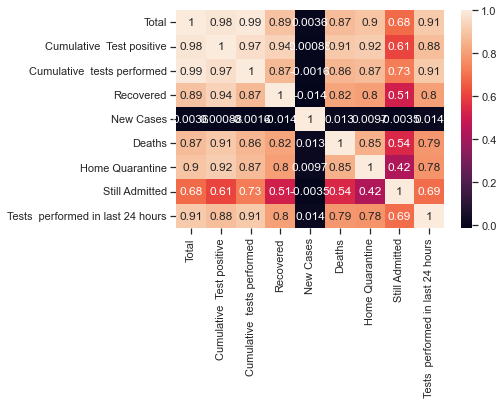

In [55]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [56]:
data.columns

Index(['Total', 'Cumulative  Test positive', 'Cumulative  tests performed',
       'Date', 'Recovered', 'New Cases', 'Deaths', 'Home Quarantine', 'Region',
       'City', 'Still Admitted', 'Tests  performed in last 24 hours'],
      dtype='object')

# Data Manipulation


In [57]:
"Identifying active cases , We counted the values by using values in confirmed, cured, deaths column"

data['Active'] = data['Cumulative  Test positive'] - data['Recovered'] - data['Deaths']
data

Total  Cumulative  Test positive  Cumulative  tests performed  \
0        48                          2                           80   
1        61                          0                           95   
2        84                         14                          171   
3        20                          0                           28   
4         3                          0                            0   
..      ...                        ...                          ...   
638   10465                       1030                        10769   
639   69806                       6699                        69806   
640   76035                      15787                        90470   
641  325091                      47382                       327072   
642  265698                      46828                       265698   

          Date  Recovered  New Cases  Deaths  Home Quarantine  \
0    3/11/2020          0          1       0                0   
1    3/11/2020          0          1       0               59   
2    3/11/2020          1          1       0               87   
3    3/11/2020          0          1       0               78   
4    3/11/2020          0          1       0              269   
..         ...        ...        ...     ...              ...   
638  6/12/2020        673          6      15              294   
639  6/12/2020       1164         16      65             5395   
640  6/12/2020       3907          2     632            10222   
641  6/12/2020       9546          1     890            34520   
642  6/12/2020      22047          0     776            22324   

               Region             City  Still Admitted  \
0               Sindh          Karachi               2   
1           Islamabad        Islamabad               0   
2               Sindh          Karachi              13   
3           Islamabad        Islamabad               0   
4    Gilgit-Baltistan           Gilgit               0   
..                ...              ...             ...   
638            Punjab           Jhelum              48   
639            Punjab           Vihari              75   
640            Punjab         Khanewal            1026   
641            Punjab        Pakpattan            2426   
642            Punjab  Dera Ghazi Khan            1681   

     Tests  performed in last 24 hours  Active  
0                                    8       2  
1                                    7       0  
2                                   55      13  
3                                    2       0  
4                                    0       0  
..                                 ...     ...  
638                                119     342  
639                               3766    5470  
640                               3571   11248  
641                               9179   36946  
642                              10081   24005  

[643 rows x 13 columns]

In [58]:
data = data.drop(['Still Admitted'],axis=1)
data

Total  Cumulative  Test positive  Cumulative  tests performed  \
0        48                          2                           80   
1        61                          0                           95   
2        84                         14                          171   
3        20                          0                           28   
4         3                          0                            0   
..      ...                        ...                          ...   
638   10465                       1030                        10769   
639   69806                       6699                        69806   
640   76035                      15787                        90470   
641  325091                      47382                       327072   
642  265698                      46828                       265698   

          Date  Recovered  New Cases  Deaths  Home Quarantine  \
0    3/11/2020          0          1       0                0   
1    3/11/2020          0          1       0               59   
2    3/11/2020          1          1       0               87   
3    3/11/2020          0          1       0               78   
4    3/11/2020          0          1       0              269   
..         ...        ...        ...     ...              ...   
638  6/12/2020        673          6      15              294   
639  6/12/2020       1164         16      65             5395   
640  6/12/2020       3907          2     632            10222   
641  6/12/2020       9546          1     890            34520   
642  6/12/2020      22047          0     776            22324   

               Region             City  Tests  performed in last 24 hours  \
0               Sindh          Karachi                                  8   
1           Islamabad        Islamabad                                  7   
2               Sindh          Karachi                                 55   
3           Islamabad        Islamabad                                  2   
4    Gilgit-Baltistan           Gilgit                                  0   
..                ...              ...                                ...   
638            Punjab           Jhelum                                119   
639            Punjab           Vihari                               3766   
640            Punjab         Khanewal                               3571   
641            Punjab        Pakpattan                               9179   
642            Punjab  Dera Ghazi Khan                              10081   

     Active  
0         2  
1         0  
2        13  
3         0  
4         0  
..      ...  
638     342  
639    5470  
640   11248  
641   36946  
642   24005  

[643 rows x 12 columns]

# creating pivot table using pandas library to suming all the positive ,deaths and recovered cases

In [59]:
"using pivot function to find cured , deaths , confirmed cases Regionwise"

Regionwise = pd.pivot_table(data,values=['Recovered','Deaths','Cumulative  Test positive'],index='Region',aggfunc='max',margins=True)
Regionwise
Regionwise.style.background_gradient(cmap = "afmhot")

# Top Province with most Active cases

In [60]:
"Top Region with most Active cases"

df_top_4 = data.nlargest(4,['Active'])

df_top_4 = data.groupby(['Region'])['Active'].max().sort_values(ascending=False).reset_index()
Region_top = df_top_4.nlargest(4,['Active'])
Region_top

Region  Active
0        Punjab   36946
1           KPK   35617
2  Azad Kashmir   21450
3         Sindh   18722

# Top 10 cities with most Active cases

In [61]:
"Top 10 cities with most Active cases"

df_top_10 = data.nlargest(10,['Active'])

df_top_10 = data.groupby(['City'])['Active'].max().sort_values(ascending=False).reset_index()
df_top = df_top_10.nlargest(10,['Active'])
df_top

City  Active
0         Pakpattan   36946
1          Malakand   35617
2  North Waziristan   28298
3        Bahawalpur   26696
4     Rahimyar Khan   24709
5   Dera Ghazi Khan   24005
6             Buner   22785
7          Nowshera   22045
8        New Mirpur   21450
9          Peshawar   20194

# "Top Region with most Death cases"

In [62]:
"Top Region with most Death cases"

df_top_deaths = data.nlargest(4,['Deaths'])

df_top_deaths = data.groupby(['Region'])['Deaths'].max().sort_values(ascending=False).reset_index()
Region_top_deaths = df_top_deaths.nlargest(4,['Deaths'])
Region_top_deaths

Region  Deaths
0        Punjab     890
1           KPK     841
2  Azad Kashmir     570
3         Sindh     541

# Top 10 cities with most death cases


In [63]:
"Top 10 cities with most Active cases"

df_topcity = data.nlargest(10,['Deaths'])

df_topcity = data.groupby(['City'])['Deaths'].max().sort_values(ascending=False).reset_index()
top_death_city = df_topcity.nlargest(10,['Deaths'])
top_death_city

City  Deaths
0         Pakpattan     890
1          Malakand     841
2   Dera Ghazi Khan     776
3          Nowshera     738
4  North Waziristan     683
5        Bahawalpur     659
6            Kurram     634
7          Khanewal     632
8     Rahimyar Khan     629
9         Dir Upper     619

# Finding Recovery Rate and Death Rate

In [64]:
"Finding recovery rate and deathrate"

Regionwise['Recoveryrate'] = Regionwise['Recovered']*100/Regionwise['Cumulative  Test positive']
Regionwise['Deathrate'] = Regionwise['Deaths']*100/Regionwise['Cumulative  Test positive']
Regionwise
Regionwise.style.background_gradient(cmap = "afmhot")

In [65]:
#Correlation amongs the "columns"
Regionwise.corr()

Cumulative  Test positive    Deaths  Recovered  \
Cumulative  Test positive                   1.000000  0.737038   0.940511   
Deaths                                      0.737038  1.000000   0.609310   
Recovered                                   0.940511  0.609310   1.000000   
Recoveryrate                                0.597755  0.224291   0.820404   
Deathrate                                   0.121654  0.760051  -0.009329   

                           Recoveryrate  Deathrate  
Cumulative  Test positive      0.597755   0.121654  
Deaths                         0.224291   0.760051  
Recovered                      0.820404  -0.009329  
Recoveryrate                   1.000000  -0.237219  
Deathrate                     -0.237219   1.000000

# Data visualization

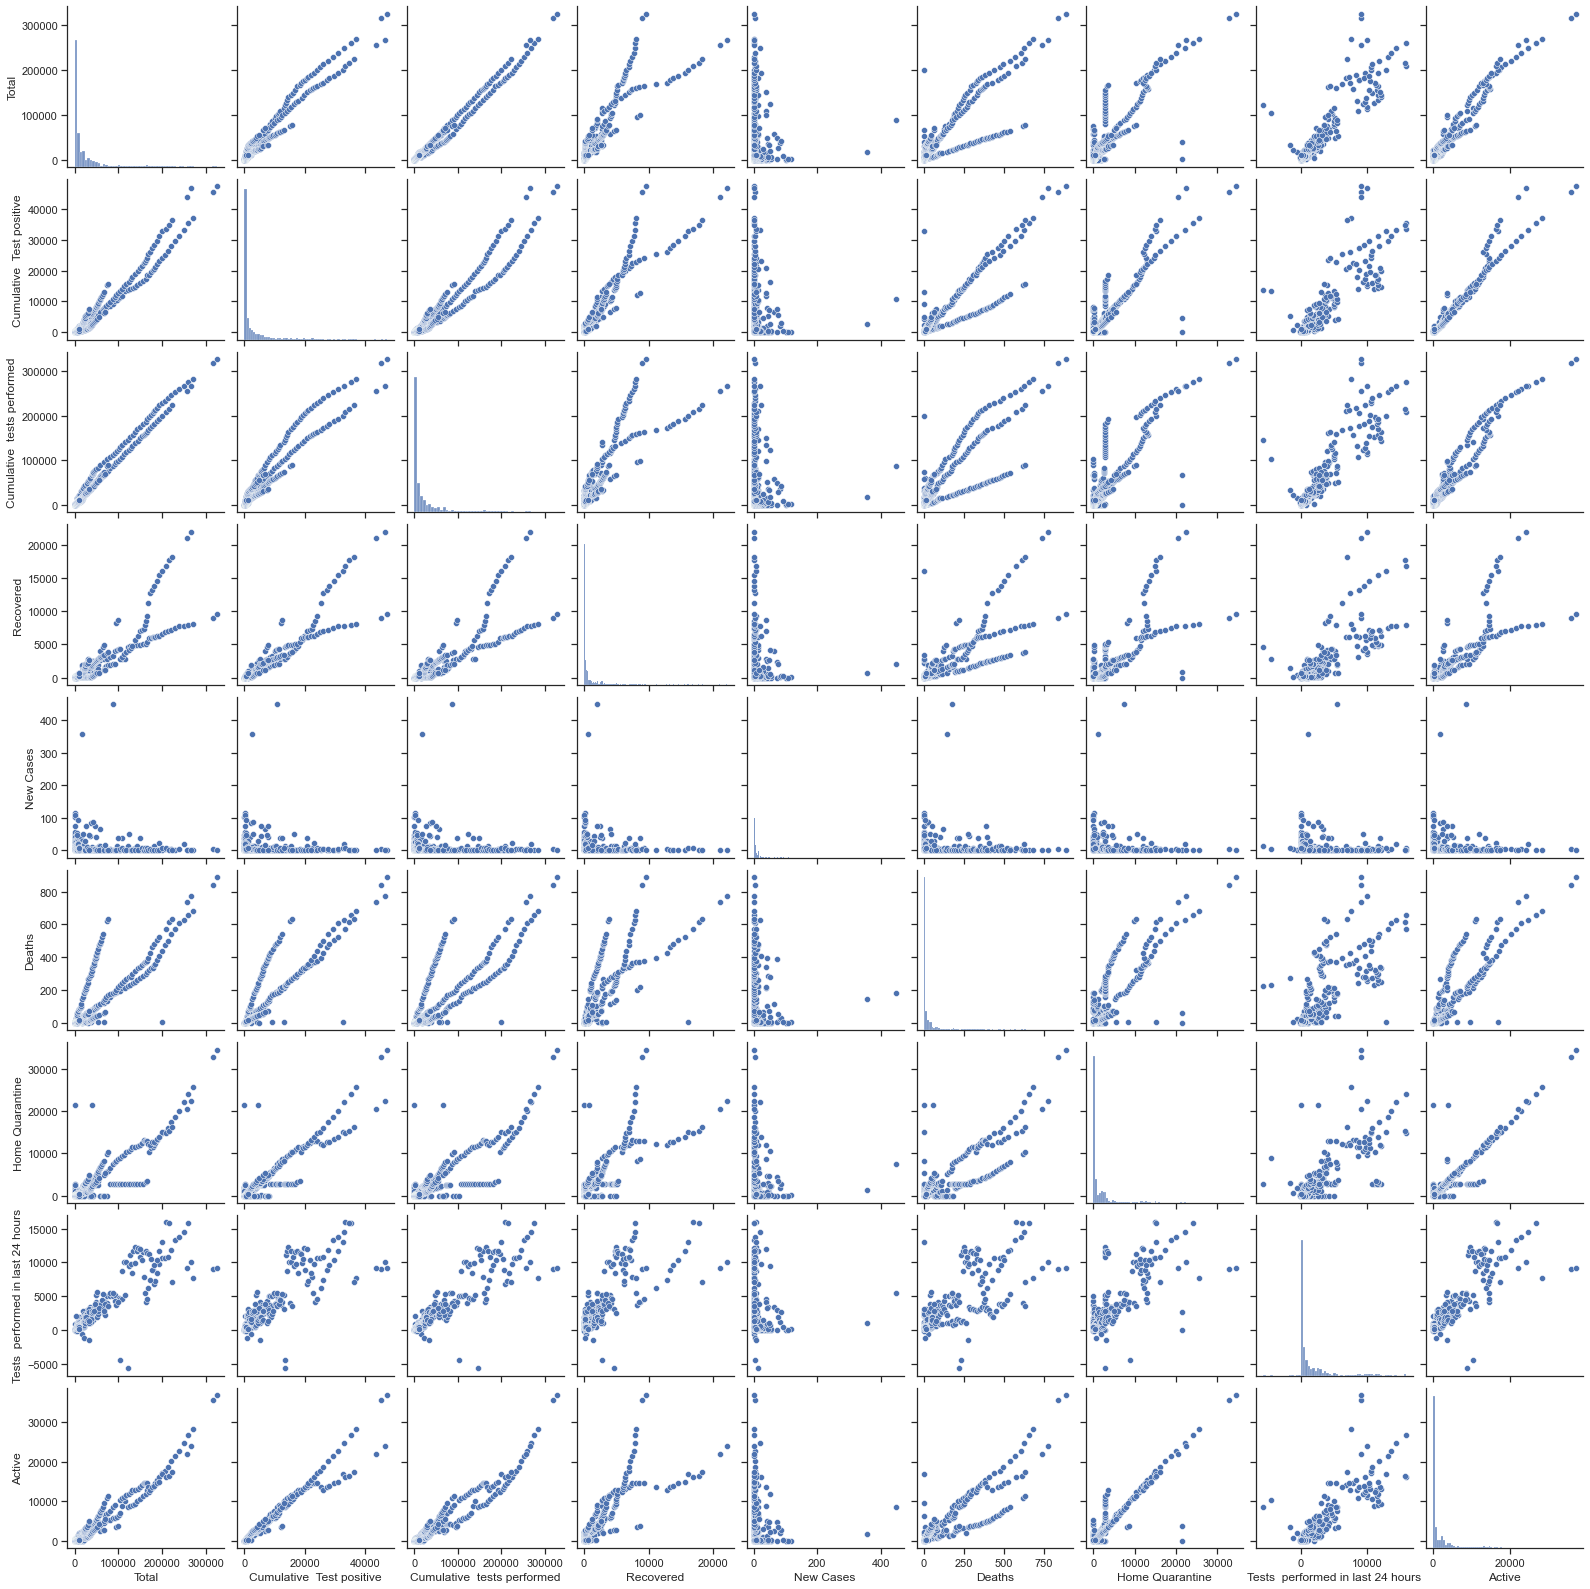

In [66]:
sns.pairplot(data)

<Figure size 12000x12000 with 0 Axes>

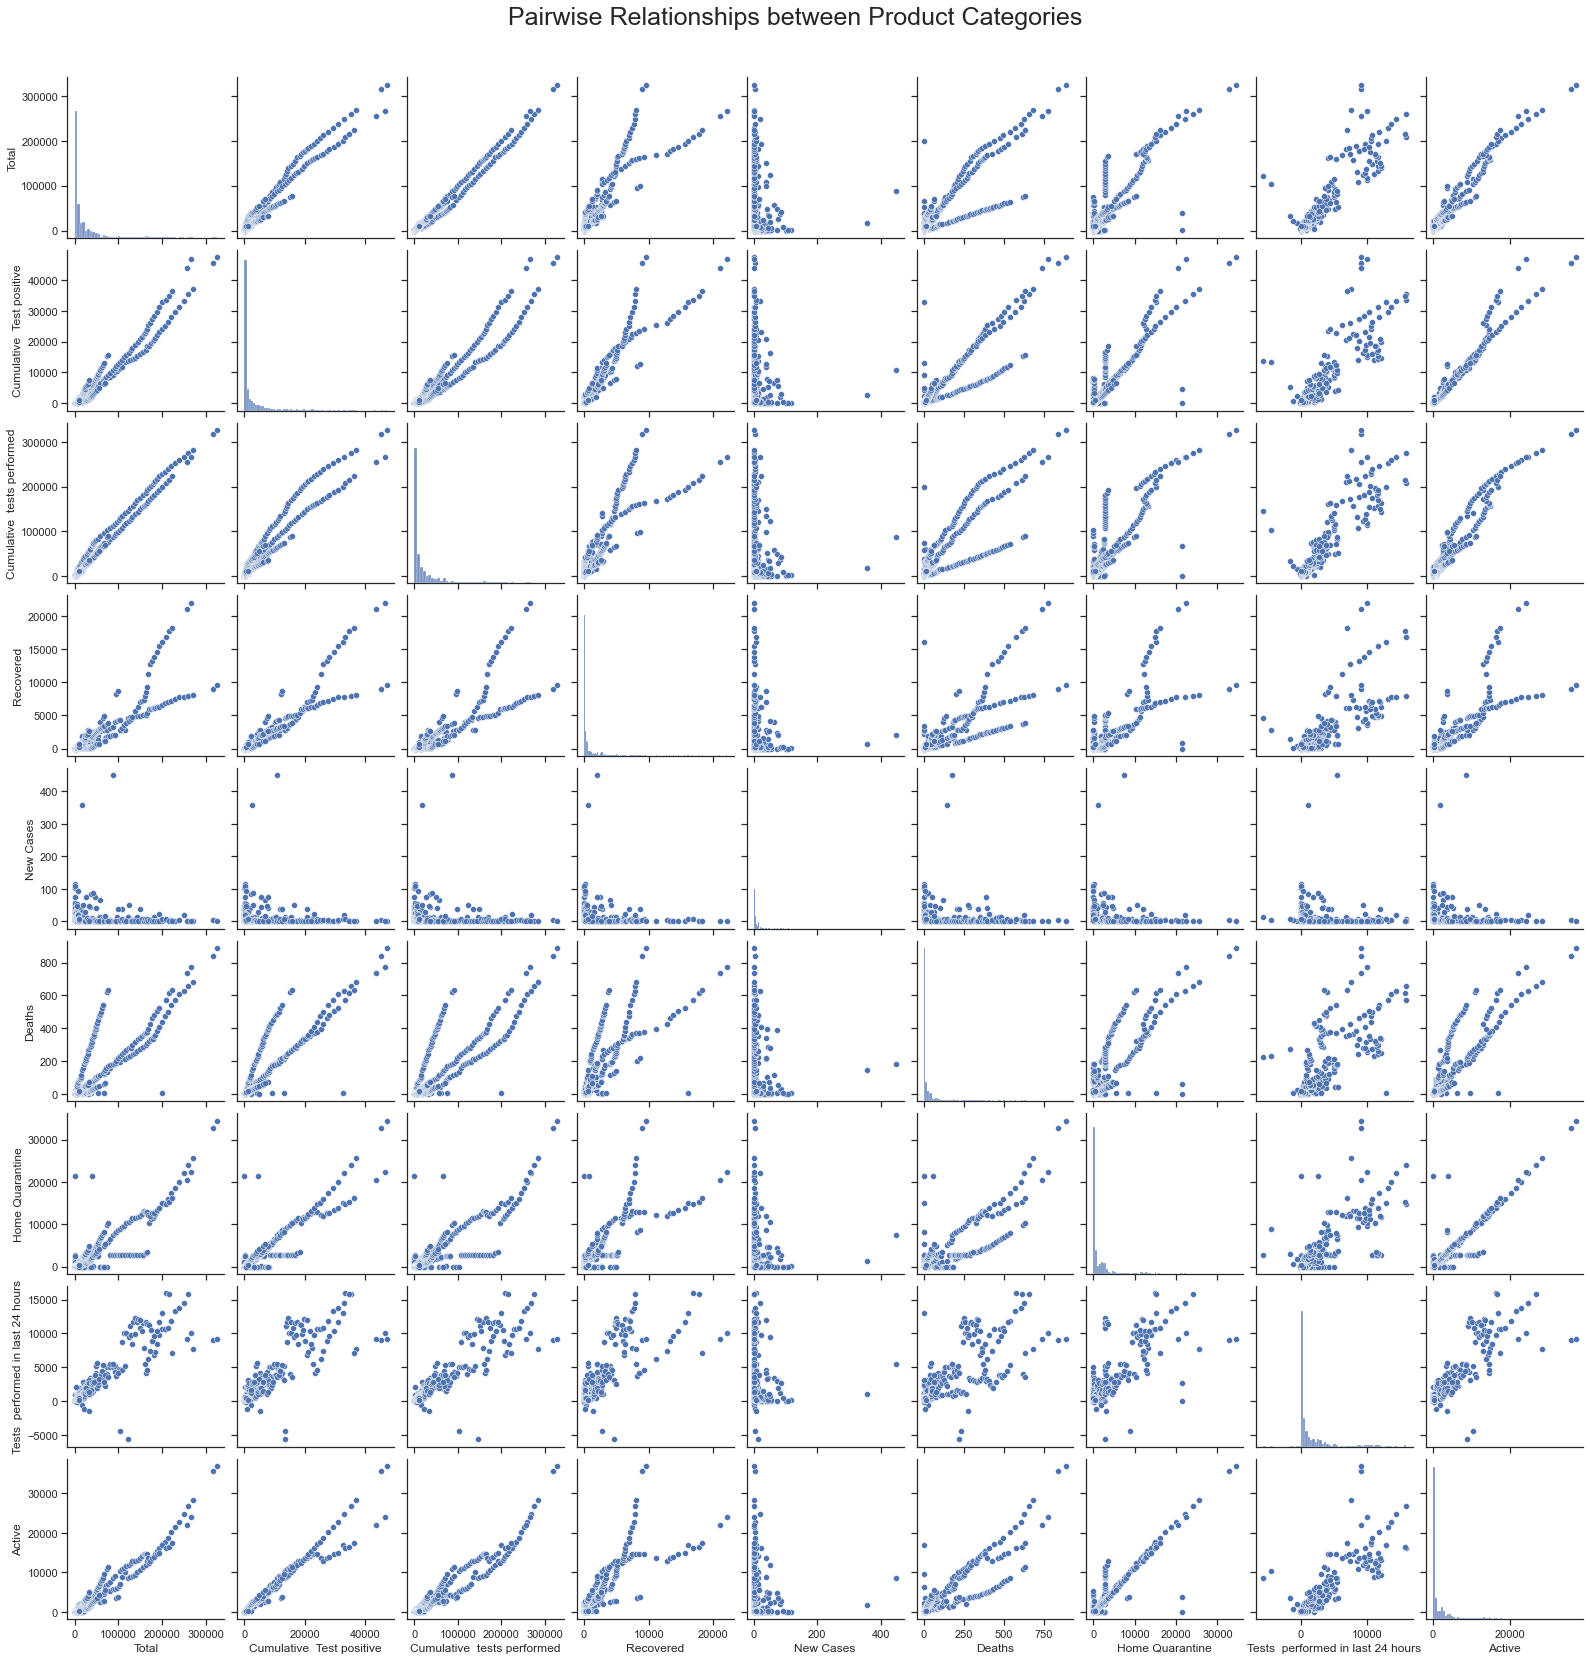

In [67]:
# write code here
#plt.subplots(dpi=100)
ax = plt.figure(dpi=400,figsize=(30,30));
sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(data);
ax.fig.suptitle("Pairwise Relationships between Product Categories", y=1.03, fontsize=25);

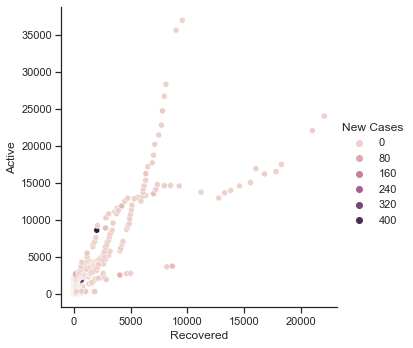

In [68]:
sns.relplot(x='Recovered',y='Active',hue='New Cases',data=data)

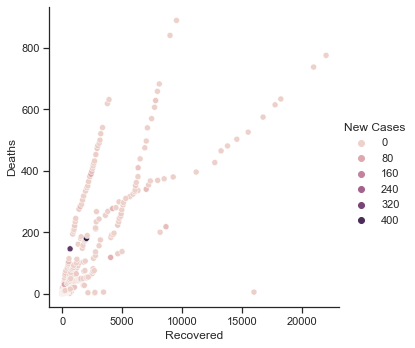

In [69]:
sns.relplot(x='Recovered',y='Deaths',hue='New Cases',data=data)

<AxesSubplot:xlabel='New Cases', ylabel='Density'>

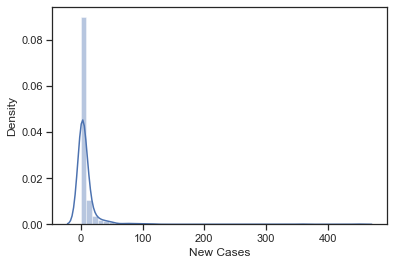

In [70]:
sns.distplot(data['New Cases'])

In [146]:
plt.figure(figsize=(18,18))

sns.barplot
plt.show()

<Figure size 1296x1296 with 0 Axes>

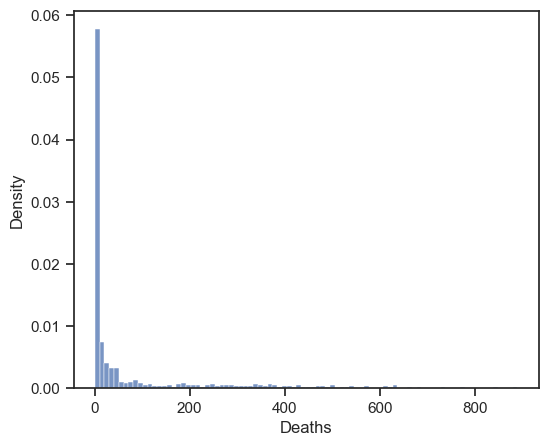

In [148]:
# create figure and axes
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

# plot to the existing fig, by using ax=ax
p = sns.histplot(data, x='Deaths', stat='density', ax=ax)

<AxesSubplot:xlabel='Active', ylabel='Count'>

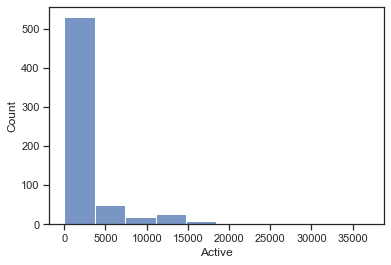

In [71]:
sns.histplot(data['Active'], bins=10)

<AxesSubplot:xlabel='Deaths', ylabel='Count'>

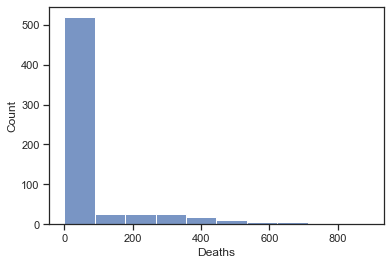

In [72]:
sns.histplot(data['Deaths'],bins=10)

<AxesSubplot:xlabel='Recovered', ylabel='Count'>

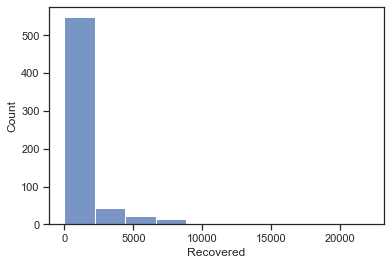

In [73]:
sns.histplot(data['Recovered'],bins=10)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

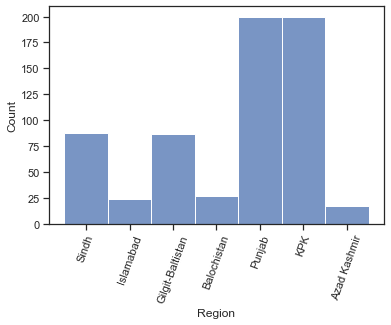

In [74]:
sns.histplot(data['Region'],bins=5)
plt.xticks(rotation=70)

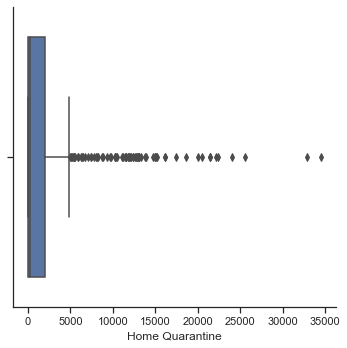

In [75]:
sns.catplot(x='Home Quarantine',kind='box',data=data)

Total Cumulative  Test positive cases = 2306844
Total Recovered cases = 746404
Total Active cases = 1514541
Total Death cases = 45899


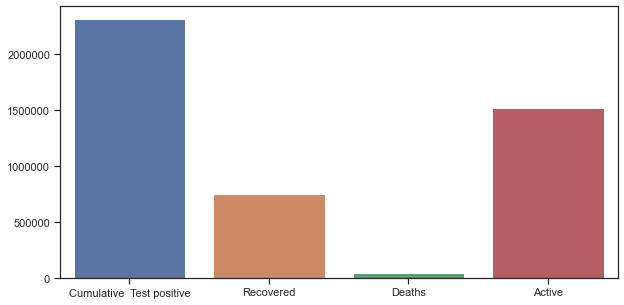

In [76]:
"""Barplot for Confirmed , Deaths , Cured , Active"""
fig = plt.figure(figsize=(10,5))

confirm= data['Cumulative  Test positive'].sum()
Recovered = data['Recovered'].sum()
deaths= data['Deaths'].sum()
active= data['Active'].sum()

print('Total Cumulative  Test positive cases =',confirm)
print('Total Recovered cases =',Recovered)
print('Total Active cases =',active)
print('Total Death cases =',deaths)

barplot = sns.barplot(x=['Cumulative  Test positive','Recovered','Deaths','Active'],y=[confirm,Recovered,deaths,active])
barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))

plt.show()


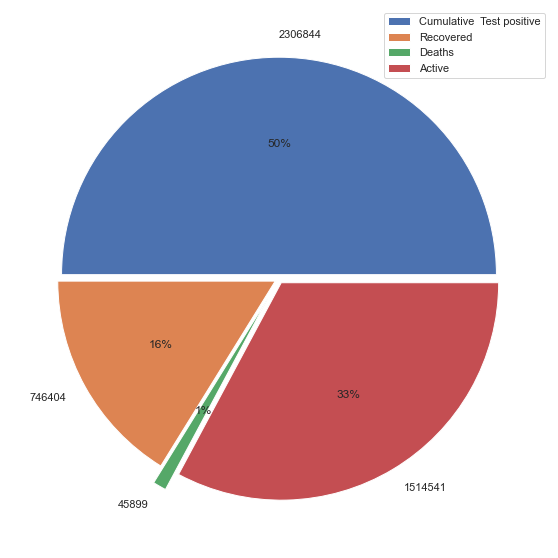

In [77]:
"Piechart for 'Confirmed','Recovered',Deaths & 'Active'"

fig = plt.figure(figsize=(30,10))
data_values = [data['Cumulative  Test positive'].sum(),data['Recovered'].sum(),data['Deaths'].sum(),data['Active'].sum()]
data_keys = [confirm,Recovered,deaths,active]

plt.pie(data_keys,labels = data_keys, explode = (0.02,0.02,0.1,0.02), autopct = '%.0f%%')
plt.legend(['Cumulative  Test positive','Recovered','Deaths','Active'])


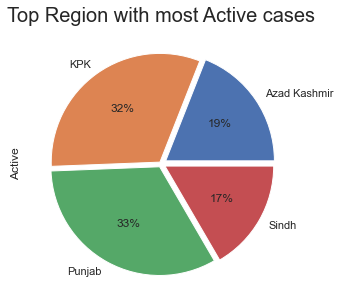

In [78]:
"Pie Chart Of Top Region with most Active cases"

fig = plt.figure(figsize=(8,5))
Region_top.groupby(["Region"]).sum()["Active"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04),autopct='%1.0f%%')
plt.title('Top Region with most Active cases',size=20)
plt.show()

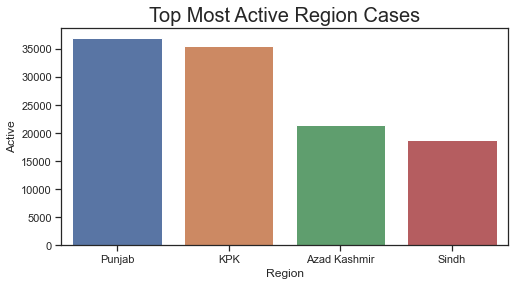

In [79]:
"Bar Plot of Top Most Active Region Cases"

fig = plt.figure(figsize=(8,4))
sns.barplot(data = Region_top.iloc[:10],y='Active',x='Region')
plt.title('Top Most Active Region Cases', size=20)
plt.show()

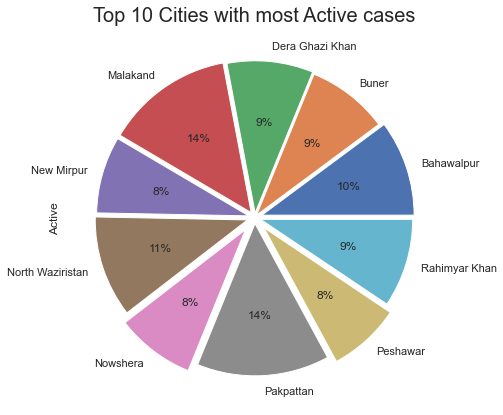

In [80]:
"Pie Chart Of Top 10 cities with most Active cases"

fig = plt.figure(figsize=(8,7))
df_top.groupby(["City"]).sum()["Active"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04,0.04,0.05,0.1,0.04,0.09,0.04),autopct='%1.0f%%')
plt.title('Top 10 Cities with most Active cases',size=20)
plt.show()


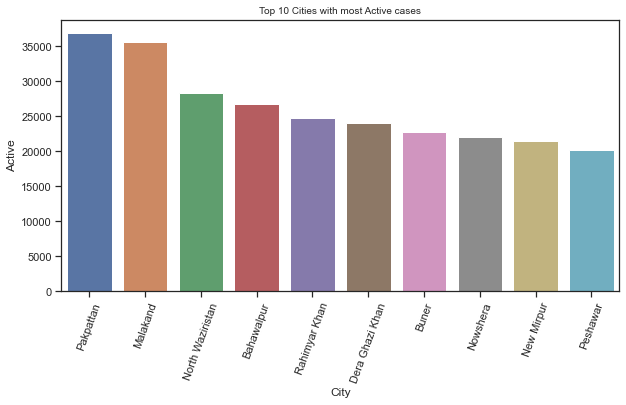

In [81]:
"Bar Plot of Top 10 Cities with most Active cases"
fig = plt.figure(figsize=(10,5))
sns.barplot(data = df_top.iloc[:10],y='Active',x='City')
plt.xticks(rotation=70)
plt.title('Top 10 Cities with most Active cases', size=10)
plt.show()

# Note : As per above visual's it is clear that Pakpattan has maximum number of Active cases wheras Peshawar has the least number of Active cases

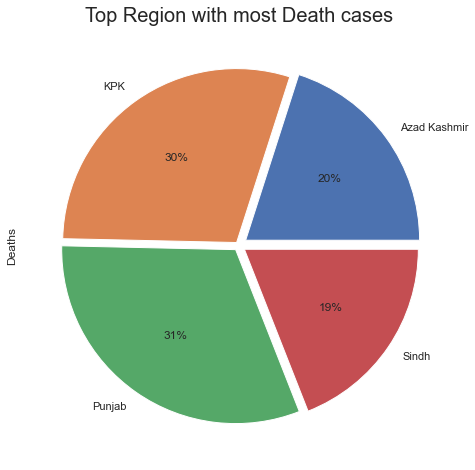

In [82]:
"Pie Chart Of Top Region with most Death cases"

fig = plt.figure(figsize=(17,8))
Region_top_deaths.groupby(["Region"]).sum()["Deaths"].plot(kind='pie',rot=90,explode=(0.05,0.02,0.03,0.04),autopct='%1.0f%%')
plt.title('Top Region with most Death cases',size=20)
plt.show()

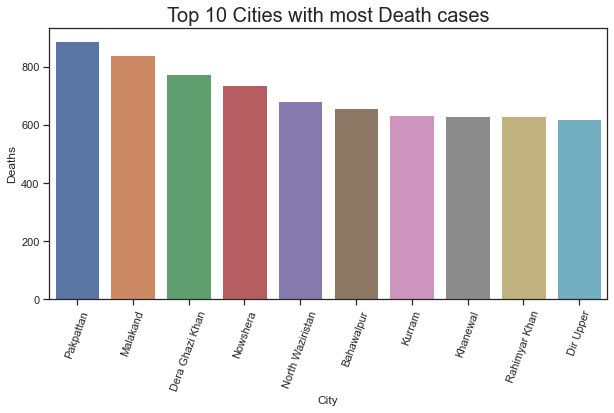

In [83]:
"Bar Plot of Top 10 Cities with most Death cases"

fig = plt.figure(figsize=(10,5))
sns.barplot(data = top_death_city.iloc[:10],y='Deaths',x='City')
plt.title('Top 10 Cities with most Death cases', size=20)
plt.xticks(rotation=70)
plt.show()

# Note : As per above visual's it is clear that Pakpattan has maximum number of Death cases wheras Dir Upper has the least number of Death cases

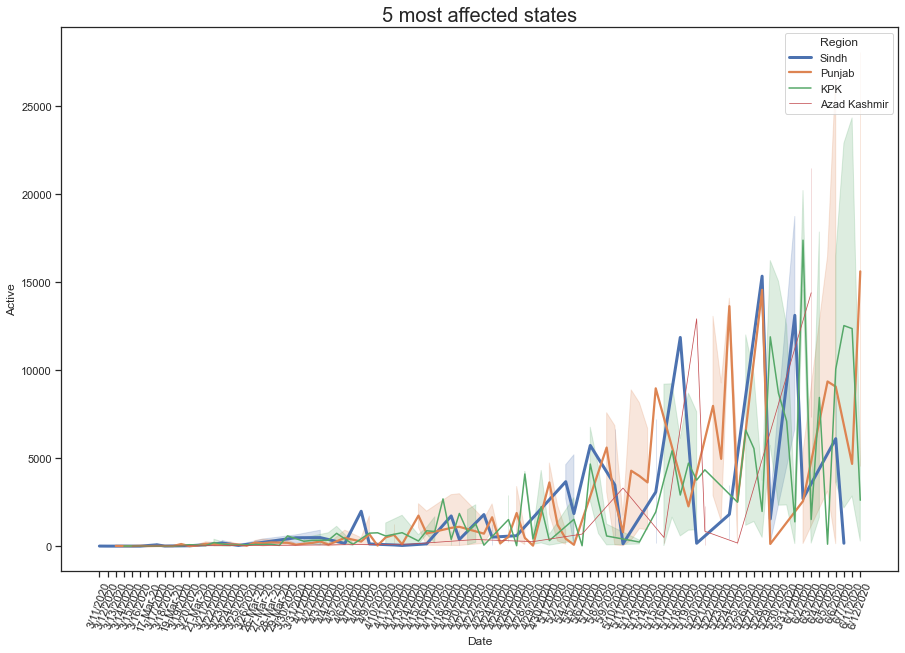

In [84]:
" Top Most affected Region"

fig = plt.figure(figsize=(15,10))
plot = sns.lineplot(data = data[data['Region'].isin(['Punjab','KPK','Azad Kashmir','Sindh'])],x='Date',y='Active',hue = 'Region',size='Region')
plt.title('5 most affected states',size=20)
plt.xticks(rotation=70)
plt.show()

# Correlation Heatmap

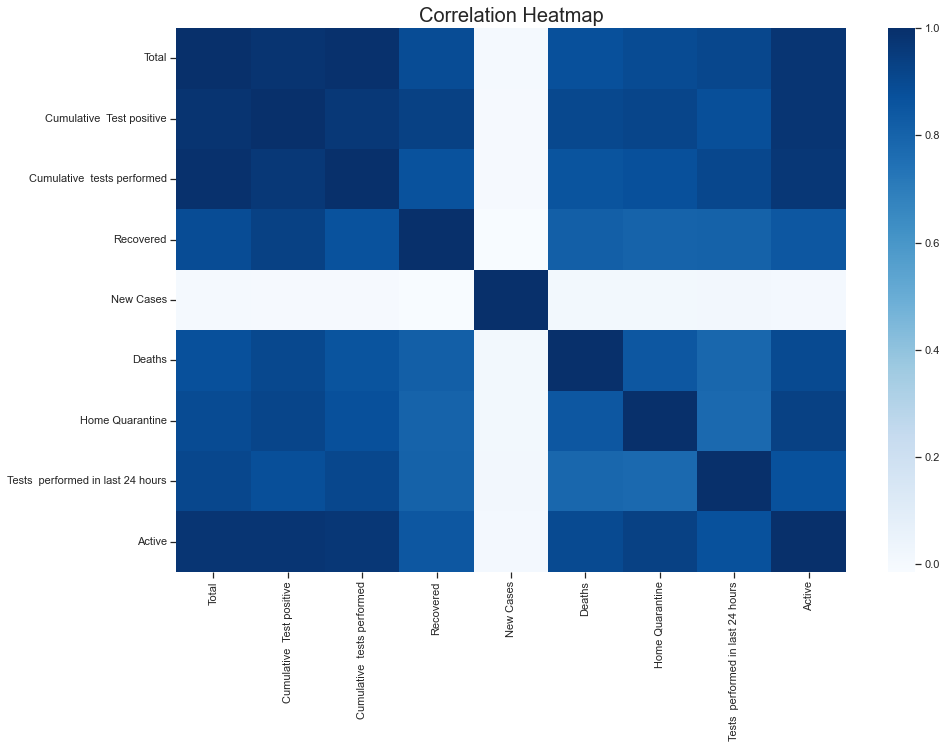

In [85]:
"Correlation Heatmap"

fig = plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="Blues")
plt.title('Correlation Heatmap',size=20)
plt.show()

# Fatality ratio of contaminated Region

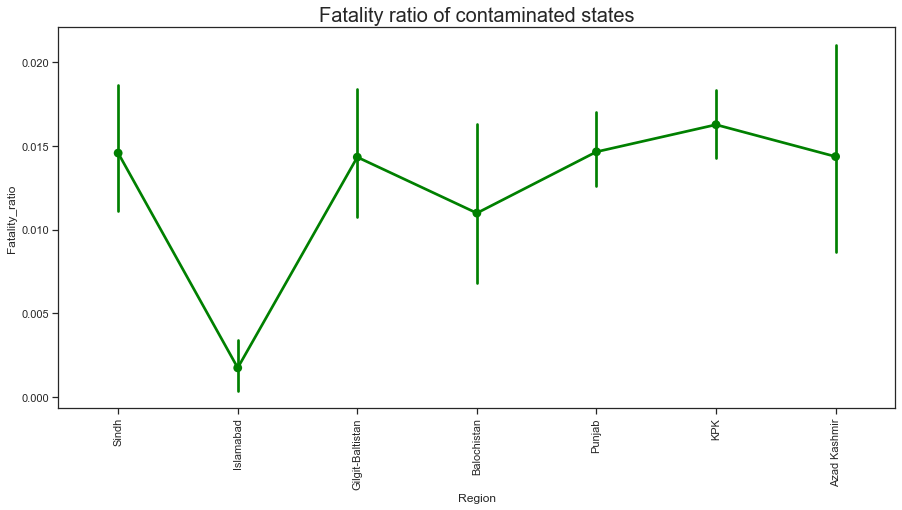

In [86]:
"Fatality ratio of contaminated Region"

data['Fatality_ratio']= data['Deaths']/data['Cumulative  Test positive']
a4_dims = (15,7)
fig,ax = plt.subplots(figsize=a4_dims)
sns.pointplot(data = data,x='Region',y='Fatality_ratio',ax=ax,color='Green')
plt.xticks(rotation=90)
plt.title('Fatality ratio of contaminated states',size=20)
plt.show()

# Fatality ratio of contaminated Cities

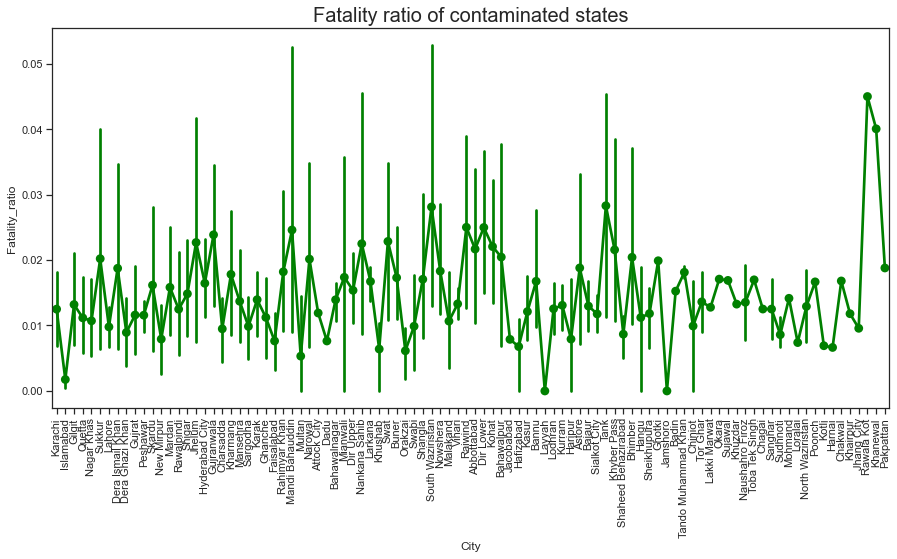

In [87]:
"Fatality ratio of contaminated Cities"

data['Fatality_ratio']= data['Deaths']/data['Cumulative  Test positive']
a4_dims = (15,7)
fig,ax = plt.subplots(figsize=a4_dims)
sns.pointplot(data = data,x='City',y='Fatality_ratio',ax=ax,color='Green')
plt.xticks(rotation=90)
plt.title('Fatality ratio of contaminated states',size=20)
plt.show()

# Trend of Daily Cases in Pakistan

In [88]:
temp = data.groupby(['Date'])['New Cases','Recovered','Deaths'].sum().reset_index()
fig = px.scatter(temp, x="Date", y="New Cases", color="New Cases",
                 size='New Cases', hover_data=['New Cases'],
                 color_discrete_sequence = ex.colors.cyclical.IceFire)
fig.update_layout(title_text='Trend of Daily Cases in Pakistan',
                  plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [89]:
data.columns

Index(['Total', 'Cumulative  Test positive', 'Cumulative  tests performed',
       'Date', 'Recovered', 'New Cases', 'Deaths', 'Home Quarantine', 'Region',
       'City', 'Tests  performed in last 24 hours', 'Active',
       'Fatality_ratio'],
      dtype='object')

In [90]:
data.isnull()

Total  Cumulative  Test positive  Cumulative  tests performed   Date  \
0    False                      False                        False  False   
1    False                      False                        False  False   
2    False                      False                        False  False   
3    False                      False                        False  False   
4    False                      False                        False  False   
..     ...                        ...                          ...    ...   
638  False                      False                        False  False   
639  False                      False                        False  False   
640  False                      False                        False  False   
641  False                      False                        False  False   
642  False                      False                        False  False   

     Recovered  New Cases  Deaths  Home Quarantine  Region   City  \
0        False      False   False            False   False  False   
1        False      False   False            False   False  False   
2        False      False   False            False   False  False   
3        False      False   False            False   False  False   
4        False      False   False            False   False  False   
..         ...        ...     ...              ...     ...    ...   
638      False      False   False            False   False  False   
639      False      False   False            False   False  False   
640      False      False   False            False   False  False   
641      False      False   False            False   False  False   
642      False      False   False            False   False  False   

     Tests  performed in last 24 hours  Active  Fatality_ratio  
0                                False   False           False  
1                                False   False            True  
2                                False   False           False  
3                                False   False            True  
4                                False   False            True  
..                                 ...     ...             ...  
638                              False   False           False  
639                              False   False           False  
640                              False   False           False  
641                              False   False           False  
642                              False   False           False  

[643 rows x 13 columns]

In [91]:
data = data.drop(['Fatality_ratio'],axis=1)

<AxesSubplot:>

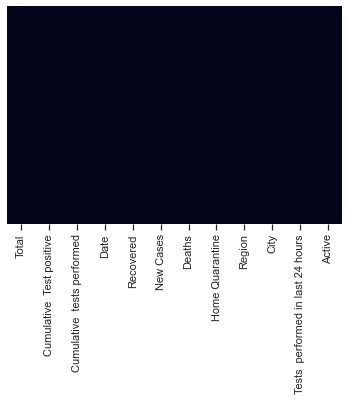

In [92]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

In [93]:
data

Total  Cumulative  Test positive  Cumulative  tests performed  \
0        48                          2                           80   
1        61                          0                           95   
2        84                         14                          171   
3        20                          0                           28   
4         3                          0                            0   
..      ...                        ...                          ...   
638   10465                       1030                        10769   
639   69806                       6699                        69806   
640   76035                      15787                        90470   
641  325091                      47382                       327072   
642  265698                      46828                       265698   

          Date  Recovered  New Cases  Deaths  Home Quarantine  \
0    3/11/2020          0          1       0                0   
1    3/11/2020          0          1       0               59   
2    3/11/2020          1          1       0               87   
3    3/11/2020          0          1       0               78   
4    3/11/2020          0          1       0              269   
..         ...        ...        ...     ...              ...   
638  6/12/2020        673          6      15              294   
639  6/12/2020       1164         16      65             5395   
640  6/12/2020       3907          2     632            10222   
641  6/12/2020       9546          1     890            34520   
642  6/12/2020      22047          0     776            22324   

               Region             City  Tests  performed in last 24 hours  \
0               Sindh          Karachi                                  8   
1           Islamabad        Islamabad                                  7   
2               Sindh          Karachi                                 55   
3           Islamabad        Islamabad                                  2   
4    Gilgit-Baltistan           Gilgit                                  0   
..                ...              ...                                ...   
638            Punjab           Jhelum                                119   
639            Punjab           Vihari                               3766   
640            Punjab         Khanewal                               3571   
641            Punjab        Pakpattan                               9179   
642            Punjab  Dera Ghazi Khan                              10081   

     Active  
0         2  
1         0  
2        13  
3         0  
4         0  
..      ...  
638     342  
639    5470  
640   11248  
641   36946  
642   24005  

[643 rows x 12 columns]

# Preparing DATASET for Logistic Regression

In [94]:
LG=data

In [95]:
LG.head(5)

Total  Cumulative  Test positive  Cumulative  tests performed       Date  \
0     48                          2                           80  3/11/2020   
1     61                          0                           95  3/11/2020   
2     84                         14                          171  3/11/2020   
3     20                          0                           28  3/11/2020   
4      3                          0                            0  3/11/2020   

   Recovered  New Cases  Deaths  Home Quarantine            Region       City  \
0          0          1       0                0             Sindh    Karachi   
1          0          1       0               59         Islamabad  Islamabad   
2          1          1       0               87             Sindh    Karachi   
3          0          1       0               78         Islamabad  Islamabad   
4          0          1       0              269  Gilgit-Baltistan     Gilgit   

   Tests  performed in last 24 hours  Active  
0                                  8       2  
1                                  7       0  
2                                 55      13  
3                                  2       0  
4                                  0       0

In [96]:
LG.tail(5)

Total  Cumulative  Test positive  Cumulative  tests performed  \
638   10465                       1030                        10769   
639   69806                       6699                        69806   
640   76035                      15787                        90470   
641  325091                      47382                       327072   
642  265698                      46828                       265698   

          Date  Recovered  New Cases  Deaths  Home Quarantine  Region  \
638  6/12/2020        673          6      15              294  Punjab   
639  6/12/2020       1164         16      65             5395  Punjab   
640  6/12/2020       3907          2     632            10222  Punjab   
641  6/12/2020       9546          1     890            34520  Punjab   
642  6/12/2020      22047          0     776            22324  Punjab   

                City  Tests  performed in last 24 hours  Active  
638           Jhelum                                119     342  
639           Vihari                               3766    5470  
640         Khanewal                               3571   11248  
641        Pakpattan                               9179   36946  
642  Dera Ghazi Khan                              10081   24005

In [97]:
LG.describe()

Total  Cumulative  Test positive  Cumulative  tests performed  \
count     643.000000                 643.000000                   643.000000   
mean    28049.569207                3587.626750                 30525.283048   
std     52406.157576                7368.132133                 56453.756905   
min         0.000000                   0.000000                     0.000000   
25%      1155.000000                  86.000000                  1370.500000   
50%      6224.000000                 465.000000                  5976.000000   
75%     26332.000000                3207.500000                 29644.500000   
max    325091.000000               47382.000000                327072.000000   

          Recovered   New Cases      Deaths  Home Quarantine  \
count    643.000000  643.000000  643.000000       643.000000   
mean    1160.814930    8.326594   71.382582      2031.129082   
std     2727.293247   26.351548  146.872462      4315.683560   
min        0.000000    0.000000    0.000000         0.000000   
25%        3.000000    1.000000    1.000000        49.000000   
50%      140.000000    2.000000    5.000000       263.000000   
75%      731.000000    6.000000   45.000000      1993.000000   
max    22047.000000  450.000000  890.000000     34520.000000   

       Tests  performed in last 24 hours        Active  
count                         643.000000    643.000000  
mean                         1524.107309   2355.429238  
std                          2937.318710   4780.616588  
min                         -5670.000000      0.000000  
25%                             4.000000     65.500000  
50%                           292.000000    249.000000  
75%                          1535.000000   2294.000000  
max                         15937.000000  36946.000000

In [98]:
pd.get_dummies(LG['Cumulative  Test positive'])

0      1      2      3      4      5      6      8      9      10     \
0        0      0      1      0      0      0      0      0      0      0   
1        1      0      0      0      0      0      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        1      0      0      0      0      0      0      0      0      0   
4        1      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
638      0      0      0      0      0      0      0      0      0      0   
639      0      0      0      0      0      0      0      0      0      0   
640      0      0      0      0      0      0      0      0      0      0   
641      0      0      0      0      0      0      0      0      0      0   
642      0      0      0      0      0      0      0      0      0      0   

     ...  33144  33536  34889  35308  36364  37090  43790  45463  46828  47382  
0    ...      0      0      0      0      0      0      0      0      0      0  
1    ...      0      0      0      0      0      0      0      0      0      0  
2    ...      0      0      0      0      0      0      0      0      0      0  
3    ...      0      0      0      0      0      0      0      0      0      0  
4    ...      0      0      0      0      0      0      0      0      0      0  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
638  ...      0      0      0      0      0      0      0      0      0      0  
639  ...      0      0      0      0      0      0      0      0      0      0  
640  ...      0      0      0      0      0      0      0      0      0      0  
641  ...      0      0      0      0      0      0      0      0      0      1  
642  ...      0      0      0      0      0      0      0      0      1      0  

[643 rows x 496 columns]

In [99]:
Positive=pd.get_dummies(LG['Cumulative  Test positive'],drop_first=True)
Positive.head(5)

1      2      3      4      5      6      8      9      10     11     ...  \
0      0      1      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   33144  33536  34889  35308  36364  37090  43790  45463  46828  47382  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 495 columns]

In [100]:
pd.get_dummies(LG['Recovered'])

0      1      2      3      4      5      6      9      10     13     \
0        1      0      0      0      0      0      0      0      0      0   
1        1      0      0      0      0      0      0      0      0      0   
2        0      1      0      0      0      0      0      0      0      0   
3        1      0      0      0      0      0      0      0      0      0   
4        1      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
638      0      0      0      0      0      0      0      0      0      0   
639      0      0      0      0      0      0      0      0      0      0   
640      0      0      0      0      0      0      0      0      0      0   
641      0      0      0      0      0      0      0      0      0      0   
642      0      0      0      0      0      0      0      0      0      0   

     ...  13272  13810  14590  15538  16022  16782  17787  18265  21007  22047  
0    ...      0      0      0      0      0      0      0      0      0      0  
1    ...      0      0      0      0      0      0      0      0      0      0  
2    ...      0      0      0      0      0      0      0      0      0      0  
3    ...      0      0      0      0      0      0      0      0      0      0  
4    ...      0      0      0      0      0      0      0      0      0      0  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
638  ...      0      0      0      0      0      0      0      0      0      0  
639  ...      0      0      0      0      0      0      0      0      0      0  
640  ...      0      0      0      0      0      0      0      0      0      0  
641  ...      0      0      0      0      0      0      0      0      0      0  
642  ...      0      0      0      0      0      0      0      0      0      1  

[643 rows x 354 columns]

In [101]:
Cured=pd.get_dummies(LG['Recovered'],drop_first=True)
Cured.head()

1      2      3      4      5      6      9      10     13     14     ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      1      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   13272  13810  14590  15538  16022  16782  17787  18265  21007  22047  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 353 columns]

In [102]:
pd.get_dummies(LG['New Cases'])

0    1    2    3    4    5    6    7    8    9    ...  75   84   87   \
0      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
1      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
4      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
638    0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
639    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
640    0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
641    0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
642    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     93   101  102  109  116  357  450  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
638    0    0    0    0    0    0    0  
639    0    0    0    0    0    0    0  
640    0    0    0    0    0    0    0  
641    0    0    0    0    0    0    0  
642    0    0    0    0    0    0    0  

[643 rows x 59 columns]

In [103]:
Newcases=pd.get_dummies(LG['New Cases'],drop_first=True)
Newcases.head()

1    2    3    4    5    6    7    8    9    10   ...  75   84   87   93   \
0    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   101  102  109  116  357  450  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 58 columns]

In [104]:
pd.get_dummies(LG['Deaths'])

0    1    2    3    4    5    6    7    8    9    ...  619  629  632  \
0      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
638    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
639    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
640    0    0    0    0    0    0    0    0    0    0  ...    0    0    1   
641    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
642    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     634  659  683  738  776  841  890  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
638    0    0    0    0    0    0    0  
639    0    0    0    0    0    0    0  
640    0    0    0    0    0    0    0  
641    0    0    0    0    0    0    1  
642    0    0    0    0    1    0    0  

[643 rows x 181 columns]

In [105]:
Deaths=pd.get_dummies(LG['Deaths'],drop_first=True)
Deaths.head(5)

1    2    3    4    5    6    7    8    9    10   ...  619  629  632  634  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   659  683  738  776  841  890  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 180 columns]

In [106]:
pd.get_dummies(LG['Active'])

0      1      2      3      4      5      6      7      8      9      \
0        0      0      1      0      0      0      0      0      0      0   
1        1      0      0      0      0      0      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        1      0      0      0      0      0      0      0      0      0   
4        1      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
638      0      0      0      0      0      0      0      0      0      0   
639      0      0      0      0      0      0      0      0      0      0   
640      0      0      0      0      0      0      0      0      0      0   
641      0      0      0      0      0      0      0      0      0      0   
642      0      0      0      0      0      0      0      0      0      0   

     ...  20194  21450  22045  22785  24005  24709  26696  28298  35617  36946  
0    ...      0      0      0      0      0      0      0      0      0      0  
1    ...      0      0      0      0      0      0      0      0      0      0  
2    ...      0      0      0      0      0      0      0      0      0      0  
3    ...      0      0      0      0      0      0      0      0      0      0  
4    ...      0      0      0      0      0      0      0      0      0      0  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
638  ...      0      0      0      0      0      0      0      0      0      0  
639  ...      0      0      0      0      0      0      0      0      0      0  
640  ...      0      0      0      0      0      0      0      0      0      0  
641  ...      0      0      0      0      0      0      0      0      0      1  
642  ...      0      0      0      0      1      0      0      0      0      0  

[643 rows x 454 columns]

In [107]:
Admitted=pd.get_dummies(LG['Active'],drop_first=True)
Admitted.head(5)

1      2      3      4      5      6      7      8      9      11     ...  \
0      0      1      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   20194  21450  22045  22785  24005  24709  26696  28298  35617  36946  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 453 columns]

In [108]:
LG=pd.concat([LG,Positive,Newcases,Deaths,Cured,Admitted],axis=1)
LG.head()

Total  Cumulative  Test positive  Cumulative  tests performed       Date  \
0     48                          2                           80  3/11/2020   
1     61                          0                           95  3/11/2020   
2     84                         14                          171  3/11/2020   
3     20                          0                           28  3/11/2020   
4      3                          0                            0  3/11/2020   

   Recovered  New Cases  Deaths  Home Quarantine            Region       City  \
0          0          1       0                0             Sindh    Karachi   
1          0          1       0               59         Islamabad  Islamabad   
2          1          1       0               87             Sindh    Karachi   
3          0          1       0               78         Islamabad  Islamabad   
4          0          1       0              269  Gilgit-Baltistan     Gilgit   

   ...  20194  21450  22045  22785  24005  24709  26696  28298  35617  36946  
0  ...      0      0      0      0      0      0      0      0      0      0  
1  ...      0      0      0      0      0      0      0      0      0      0  
2  ...      0      0      0      0      0      0      0      0      0      0  
3  ...      0      0      0      0      0      0      0      0      0      0  
4  ...      0      0      0      0      0      0      0      0      0      0  

[5 rows x 1551 columns]

In [109]:
LG.drop(['Total','Date','Home Quarantine','Cumulative  tests performed','Region','City','Tests  performed in last 24 hours','Cumulative  Test positive','Active'], axis=1, inplace=True)

In [110]:
LG.head()

Recovered  New Cases  Deaths  1  2  3  4  5  6  8  ...  20194  21450  \
0          0          1       0  0  1  0  0  0  0  0  ...      0      0   
1          0          1       0  0  0  0  0  0  0  0  ...      0      0   
2          1          1       0  0  0  0  0  0  0  0  ...      0      0   
3          0          1       0  0  0  0  0  0  0  0  ...      0      0   
4          0          1       0  0  0  0  0  0  0  0  ...      0      0   

   22045  22785  24005  24709  26696  28298  35617  36946  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 1542 columns]

In [111]:
LG.columns

Index(['Recovered', 'New Cases',    'Deaths',           1,           2,
                 3,           4,           5,           6,           8,
       ...
             20194,       21450,       22045,       22785,       24005,
             24709,       26696,       28298,       35617,       36946],
      dtype='object', length=1542)

# Performing Logistic Regression

In [112]:
x= LG.drop("Recovered",axis=1)
y= LG["Recovered"]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
logmodel=LogisticRegression()

In [117]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [118]:
predictions = logmodel.predict(X_test)

In [119]:
from sklearn.metrics import classification_report

In [120]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.57      0.97      0.72        39\n           1       0.00      0.00      0.00         3\n           2       0.00      0.00      0.00         4\n           3       0.00      0.00      0.00         6\n           4       0.00      0.00      0.00         2\n           5       0.00      0.00      0.00         1\n           6       0.00      0.00      0.00         0\n           9       0.00      0.00      0.00         0\n          13       0.00      0.00      0.00         1\n          14       0.00      0.00      0.00         2\n          15       0.00      0.00      0.00         1\n          16       0.00      0.00      0.00         1\n          17       0.00      0.00      0.00         1\n          23       0.00      0.00      0.00         1\n          25       0.00      0.00      0.00         1\n          29       0.00      0.00      0.00         1\n          30       0.00      0.00      0.00         1\n       

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(y_test,predictions)

array([[38,  0,  0, ...,  0,  0,  0],
       [ 3,  0,  0, ...,  0,  0,  0],
       [ 3,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(y_test,predictions)

0.21761658031088082

In [125]:
accuracy_score(y_test,predictions)*100

21.761658031088082

# Corss_Validation

In [126]:
LG

Recovered  New Cases  Deaths  1  2  3  4  5  6  8  ...  20194  21450  \
0            0          1       0  0  1  0  0  0  0  0  ...      0      0   
1            0          1       0  0  0  0  0  0  0  0  ...      0      0   
2            1          1       0  0  0  0  0  0  0  0  ...      0      0   
3            0          1       0  0  0  0  0  0  0  0  ...      0      0   
4            0          1       0  0  0  0  0  0  0  0  ...      0      0   
..         ...        ...     ... .. .. .. .. .. .. ..  ...    ...    ...   
638        673          6      15  0  0  0  0  0  0  0  ...      0      0   
639       1164         16      65  0  0  0  0  0  0  0  ...      0      0   
640       3907          2     632  0  0  0  0  0  0  0  ...      0      0   
641       9546          1     890  0  0  0  0  0  0  0  ...      0      0   
642      22047          0     776  0  0  0  0  0  0  0  ...      0      0   

     22045  22785  24005  24709  26696  28298  35617  36946  
0        0      0      0      0      0      0      0      0  
1        0      0      0      0      0      0      0      0  
2        0      0      0      0      0      0      0      0  
3        0      0      0      0      0      0      0      0  
4        0      0      0      0      0      0      0      0  
..     ...    ...    ...    ...    ...    ...    ...    ...  
638      0      0      0      0      0      0      0      0  
639      0      0      0      0      0      0      0      0  
640      0      0      0      0      0      0      0      0  
641      0      0      0      0      0      0      0      1  
642      0      0      1      0      0      0      0      0  

[643 rows x 1542 columns]

In [127]:
### independent and dependent features
X=LG.iloc[:,2:]
y=LG.iloc[:,1]

In [128]:
X.head()

Deaths  1  2  3  4  5  6  8  9  10  ...  20194  21450  22045  22785  24005  \
0       0  0  1  0  0  0  0  0  0   0  ...      0      0      0      0      0   
1       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   
2       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   
3       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   
4       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   

   24709  26696  28298  35617  36946  
0      0      0      0      0      0  
1      0      0      0      0      0  
2      0      0      0      0      0  
3      0      0      0      0      0  
4      0      0      0      0      0  

[5 rows x 1540 columns]

In [129]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: New Cases, dtype: int64

In [130]:
X=X.dropna(axis=1)

In [131]:
X.head()

Deaths  1  2  3  4  5  6  8  9  10  ...  20194  21450  22045  22785  24005  \
0       0  0  1  0  0  0  0  0  0   0  ...      0      0      0      0      0   
1       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   
2       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   
3       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   
4       0  0  0  0  0  0  0  0  0   0  ...      0      0      0      0      0   

   24709  26696  28298  35617  36946  
0      0      0      0      0      0  
1      0      0      0      0      0  
2      0      0      0      0      0  
3      0      0      0      0      0  
4      0      0      0      0      0  

[5 rows x 1540 columns]

In [132]:
y.value_counts()

1      196
2       96
4       48
0       48
3       43
5       32
6       29
7       19
10      12
9       11
14       9
8        9
13       7
11       6
15       6
21       5
16       5
25       4
19       3
20       3
23       3
33       3
31       2
40       2
24       2
50       2
12       2
38       2
74       2
17       2
47       2
22       1
84       1
75       1
28       1
37       1
30       1
87       1
45       1
39       1
46       1
450      1
54       1
41       1
65       1
357      1
109      1
44       1
29       1
101      1
26       1
116      1
27       1
32       1
55       1
49       1
35       1
102      1
93       1
Name: New Cases, dtype: int64

# HoldOut validation Approach Train and test split

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
result = model.score(X_test, y_test)*100
print(result)

92.2279792746114


# K Fold Cross Validation

In [134]:
from sklearn.model_selection import KFold
model = DecisionTreeClassifier()
kfold_validation = KFold(10)

In [135]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.93846154 0.89230769 0.93846154 0.921875   0.921875   0.921875
 0.90625    0.9375     0.890625   0.796875  ]
0.906610576923077


# Stratified K-fold Cross Validation

In [136]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))


0.8972868217054263


In [137]:
scores=cross_val_score(model,X,y,cv=skfold)*100
print(np.mean(scores))

90.1937984496124


In [138]:
scores

array([91.47286822, 93.02325581, 91.47286822, 90.625     , 84.375     ])

# Leave One Out Validation(LOOCV)

In [139]:
from sklearn.model_selection import LeaveOneOut
model = DecisionTreeClassifier()
leave_validation = LeaveOneOut()
result = cross_val_score(model,X,y,cv=leave_validation)

In [140]:
results

array([0.93846154, 0.89230769, 0.93846154, 0.921875  , 0.921875  ,
       0.921875  , 0.90625   , 0.9375    , 0.890625  , 0.796875  ])

In [141]:
print(np.mean(results))

0.906610576923077


# Repeated Random Test-Train Splits

In [142]:
from sklearn.model_selection import ShuffleSplit
model = DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)

In [143]:
results

array([0.90673575, 0.88601036, 0.92227979, 0.84974093, 0.9119171 ,
       0.86010363, 0.86010363, 0.87046632, 0.89119171, 0.88082902])

In [144]:
print(np.mean(results))

0.8839378238341968
